<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/06_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering (Dendogram)

## Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read the data

In [ ]:
data_hc = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/shopping_data.csv')
data_hc.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data information

In [ ]:
data_hc.shape

(200, 5)

In [ ]:
data_hc.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Variables (columns) considered for clustering

In [ ]:
# Considering only Annual income & Spending score for clustering

New_data_hc = data_hc.iloc[:, 3:5].values  

## Run Dendogram based hierarchial clustering

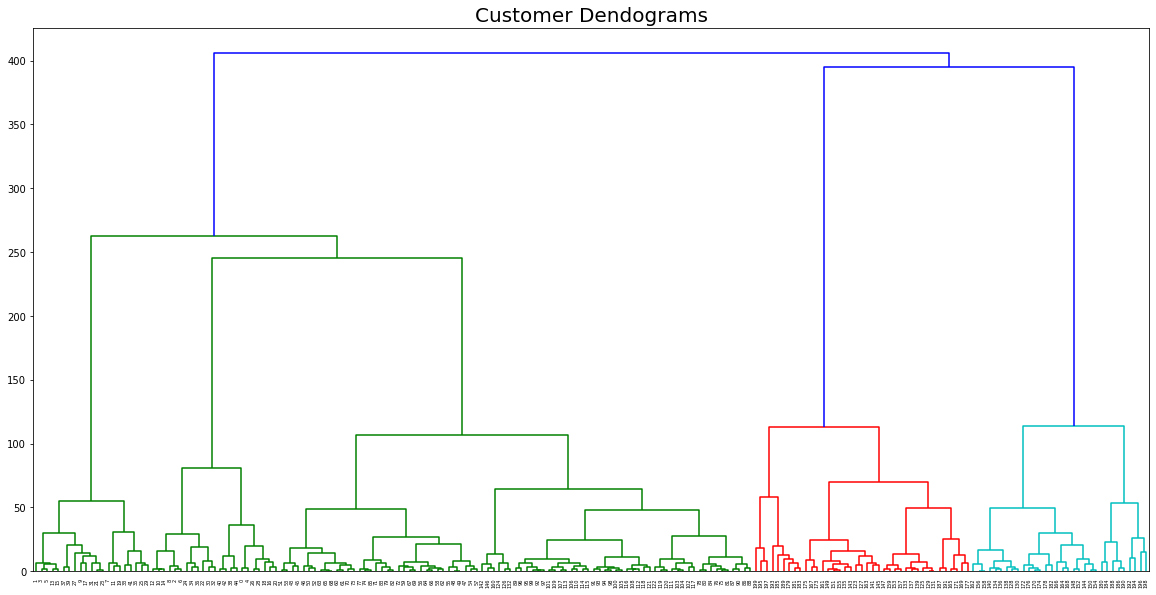

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))  
plt.title("Customer Dendograms",fontsize=20)  
dend = shc.dendrogram(shc.linkage(New_data_hc, method='ward'))  

## Predict the clusters for the observations 

#### Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

#### Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

#### Average linkage minimizes the average of the distances between all observations of pairs of clusters.

#### Single linkage minimizes the distance between the closest observations of pairs of clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(New_data_hc) 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Plot the clusters

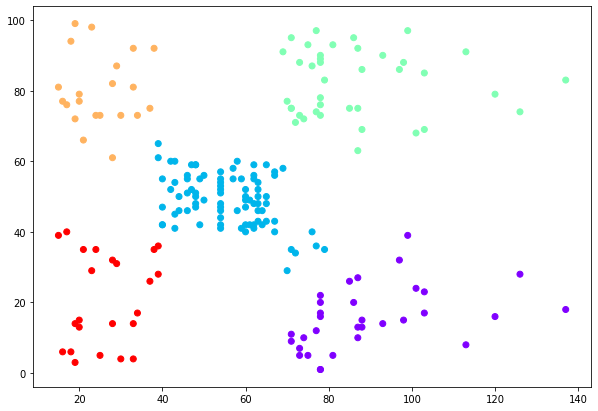

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(New_data_hc[:,0], New_data_hc[:,1], c=cluster.labels_, cmap='rainbow')  
plt.show()

# Non Hierarchical Clustering (k - means)

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Read the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/Cust_Spend_Data.csv')
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


## Data information

In [ ]:
data.shape

(10, 7)

In [ ]:
data.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


In [ ]:
# Customer ID & Name does not any significance so drop those from dataset

data.drop(['Cust_ID','Name'],axis=1,inplace=True)
data.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [ ]:
# Convert dataframe to array before standardization
data_array = data.values

## Data Transformation

### Feature scaling

In [ ]:
from sklearn import preprocessing
data_standardized = preprocessing.scale(data_array)
data_standardized = pd.DataFrame(data_standardized, columns = data.columns)  # Convert to data frame after standardization

data_standardized.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


## WSS Plot or Elbow Curve for Optimal cluster identification

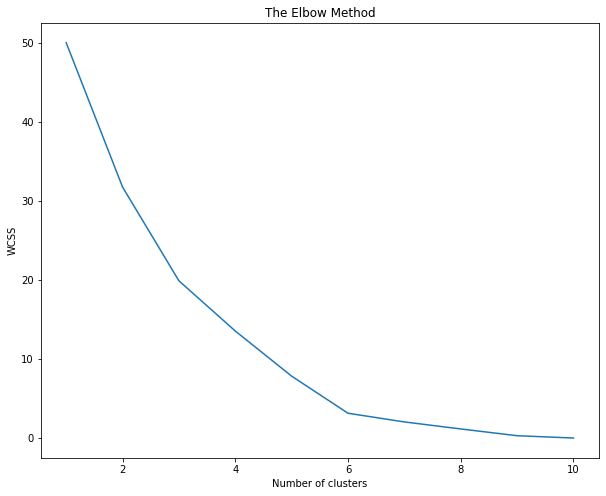

In [ ]:
# find the appropriate cluster number

plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow seen at k-value of 3

## K-Means Clustering & Cluster Information

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
data['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,
1,2375.0,3.0,0.0,1.2,4.5
2,7833.3,4.7,1.0,1.7,2.7
3,5166.7,4.7,0.0,11.0,4.7
